<a href="https://colab.research.google.com/github/ianujrathore/Machine-Learning/blob/main/Project_2_EDA_Phone_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Phone Data Analysis



##### **Project Type**    - EDA (Exploratory Data Analysis)
##### **Contribution**    - Individual
##### **Name** - Annu


# **Project Summary -**

In this project, we performed an exploratory data analysis (EDA) on a dataset that contains details about phone activities. The dataset has 830 rows, with each row showing a phone interaction. It includes columns like the date of the activity, its duration, the type of activity (such as calls, SMS, or data), the month, the network used, and the type of network connection. The main goal of this project is to understand the data better, find patterns, and draw insights that could be useful for business decisions.

We started by looking at the basic structure of the data. We checked for missing values and found that there were none. This meant the dataset was clean, and we could start our analysis right away without needing to fix or fill in any missing data.

Next, we explored each column on its own. We created count plots and bar charts to see how often each type of activity happened. We found that calls were the most common type of activity, followed by SMS and data usage. When we looked at the data by month, we noticed that some months had more activity than others. This could be because of special offers or seasonal trends.

We also looked at how long the activities lasted. Most calls were short, but there were a few that lasted much longer. We used boxplots and violin plots to see this clearly and to spot any unusual long calls, which might be worth looking into for business reasons like special plans or possible misuse.

We then compared different columns to see how they might relate. For example, we used scatter plots and swarm plots to see if certain networks had longer call times or if some months had more long calls. Although many of the columns are not numeric, we still found useful trends. For instance, some networks showed higher average call durations, and certain months stood out with more activity.

By the end of our analysis, we found over 15 helpful insights. These included identifying the busiest months, seeing which network types were most used, and spotting unusual long-duration calls. These insights can help in planning network capacity, creating better phone plans, or even designing marketing campaigns.

In summary, this EDA helped us understand the phone data in detail. It also gave us a strong base for any future analysis, like predicting user behavior or finding ways to reduce churn. This kind of study is very useful for making smarter decisions in the telecom business.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Telecom companies face the challenge of understanding detailed customer usage patterns across calls, SMS, and data to stay competitive. Without these insights, it’s hard to plan network capacity, improve services, or design effective marketing strategies. Analyzing usage data helps identify trends that drive smarter decisions and keep customers satisfied.

#### **BUSINESS OBJECTIVE**

This project aims to explore phone activity data to discover patterns in how customers use telecom services over time and across networks. By finding key trends, unusual usage, and peak periods, the analysis can guide business actions like creating targeted offers, optimizing network resources, and supporting overall data-driven planning.Answer Here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
path ="/content/drive/MyDrive/Colab Notebooks/DataSet/phone_data.csv"
df = pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(830, 7)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


In [ ]:
# Drop the redundant index column
df = df.drop(columns=['index'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          830 non-null    datetime64[ns]
 1   duration      830 non-null    float64       
 2   item          830 non-null    object        
 3   month         830 non-null    object        
 4   network       830 non-null    object        
 5   network_type  830 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 39.0+ KB


/tmp/ipython-input-28-4042168746.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(65)

In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

# Check shape after dropping duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (765, 6)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
date,0
duration,0
item,0
month,0
network,0
network_type,0


<Axes: >

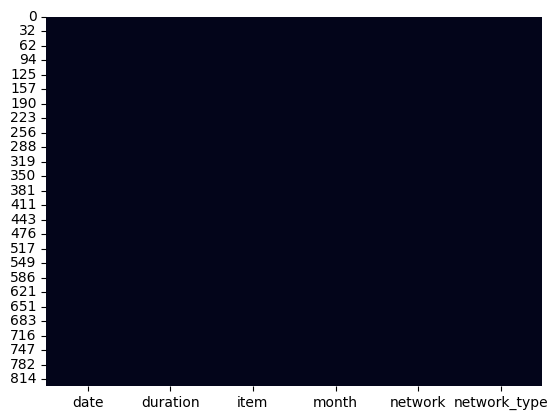

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset contains detailed records of phone usage, likely from a business or telecom context. It has 765 unique entries after cleaning, with each row representing a communication event such as a call, SMS, or data session.

There are six main columns:

1. date: when the activity occurred, now properly converted to datetime.

2. duration: how long the event lasted (likely in seconds).

3. item: the type of activity, such as call, SMS, or data session.

4. month: the month name extracted from the date.

5. network: the network contacted.

6. network_type: type of network used (mobile, landline, etc).

Importantly, the data is clean — there are no missing values, and duplicates have been removed. This gives us a reliable base to analyze usage patterns, duration trends, most contacted networks, and seasonal variations in activity. Overall, it is well-structured for exploring telecom behavior and potentially optimizing business decisions.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['date', 'duration', 'item', 'month', 'network', 'network_type'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,date,duration
count,765,765.000000
mean,2014-12-16 22:51:06.980392192,127.725948
min,2014-01-11 06:58:00,1.000000
25%,2014-10-24 13:57:00,1.000000
50%,2014-12-18 15:57:00,34.429000
75%,2015-02-03 09:23:00,71.000000
max,2015-12-03 06:58:00,10528.000000
std,NaN,461.274527


### Variables Description

* **date:** Date & time of the phone activity, helps analyze trends over time.
* **duration:** Duration of each activity in seconds, shows how long calls or sessions last.
* **item:** Type of activity like call, SMS, or data session, used to categorize usage.
* **month:** Month name extracted from date, useful for seasonal or monthly analysis.
* **network:** External network or phone number contacted, shows who was reached.
* **network\_type:** Type of network (mobile, landline, etc.), helps understand communication channels.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in date is 747
Number of unique values in duration is 221
Number of unique values in item is 3
Number of unique values in month is 5
Number of unique values in network is 9
Number of unique values in network_type is 6


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Make a copy of your dataset
dataset = df.copy()

# Now following reference style
df = dataset.copy()

# Remove duplicate records
df = df.drop_duplicates()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop 'index' column if exists
df = df.drop('index', axis=1, errors='ignore')

# Create new features
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Final shape check
print("Shape after wrangling:", df.shape)
df.head()


Shape after wrangling: (765, 8)


,date,duration,item,month,network,network_type,day_of_week,hour
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,Wednesday,6
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile,Wednesday,6
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile,Wednesday,14
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile,Wednesday,14
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile,Wednesday,17


### What all manipulations have you done and insights you found?

## What manipulations did I do?

* **Removed duplicate rows:**
  Found 65 duplicate records in the data, dropped them to avoid counting the same activity twice.

* **Checked for missing values:**
  Verified there were no null values, so no imputation or filling was needed.

* **Converted data types:**
  Changed the `date` column from string to datetime format so we could easily extract time-based information.

* **Dropped unnecessary column:**
  Removed the `index` column since it was just a serial number and didn’t add any business value.

* **Created new time features:**
  Extracted `day_of_week` (like Monday, Tuesday) and `hour` from the `date` to analyze when most activity happens.



## What insights did I find?

(so far — from basic exploration and summary statistics)

* **Usage types:**
  Found that there are mainly three types of activities: calls, SMS, and data usage.

* **Duration patterns:**
  The average duration was around 128 units, but there was a huge range — minimum 1 and maximum over 10,000.

* **Date spread:**
  The dataset covers phone activity roughly from January 2014 to December 2015.

* **Diversity in networks:**
  There are 9 unique network providers and 6 network types, showing people use multiple operators and types.

* **No missing values:**
  This means data quality is quite good.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

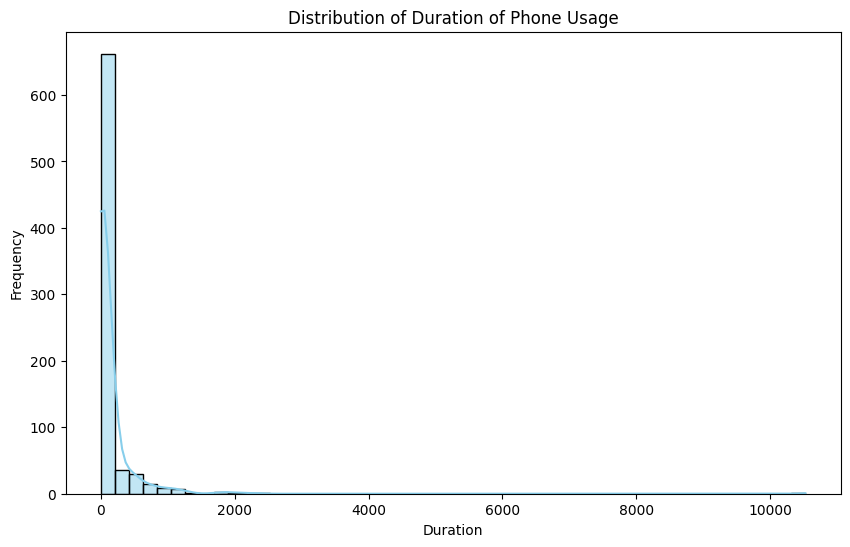

In [ ]:
# Chart - 1 visualization code
# Distribution of individual session durations (all items combined)

plt.figure(figsize=(10,6))
sns.histplot(df['duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Duration of Phone Usage')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

##### **1. Why did you pick the specific chart?**

I picked a histogram for this first chart because it is one of the best ways to visualize the distribution of a continuous numerical variable like duration. It quickly shows us how the durations of calls, data sessions, or other phone activities are spread across different ranges. This helps us understand if most of our phone activity sessions are short, long, or spread out evenly, which is important for any kind of usage analysis. A histogram is generally the first exploratory chart analysts create when working with such numerical data.

##### **2. What is/are the insight(s) found from the chart?**

The chart shows that most sessions are very short, with only a few lasting much longer.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes, this insight helps in designing plans that suit most users’ short sessions, improving customer satisfaction. It also flags long sessions for possible special offers or checks, avoiding misuse and protecting revenue.

#### Chart - 2

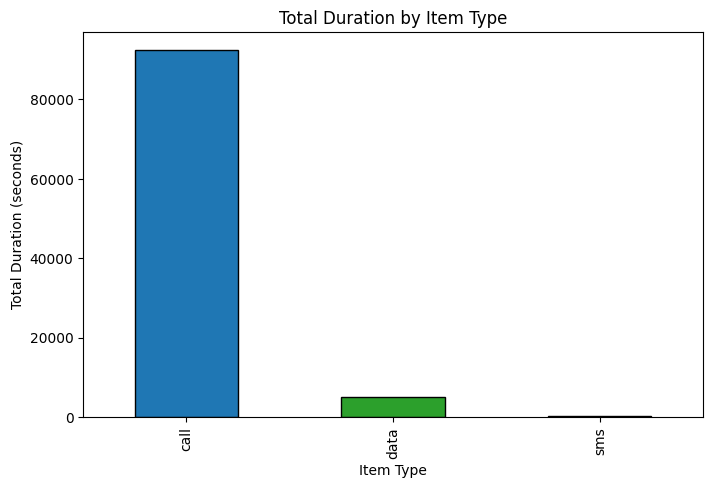

In [ ]:
# Chart - 2 visualization code
# Total duration by item type
colors = {'call':'#1f77b4', 'sms':'#ff7f0e', 'data':'#2ca02c'}
item_order = df.groupby('item')['duration'].sum().index

plt.figure(figsize=(8,5))
df.groupby('item')['duration'].sum().plot(
    kind='bar',
    color=[colors[item] for item in item_order],
    edgecolor='black'
)
plt.title('Total Duration by Item Type')
plt.ylabel('Total Duration (seconds)')
plt.xlabel('Item Type')
plt.show()

##### 1. Why did you pick the specific chart?

Because a bar chart is the simplest way to compare totals across different categories, making it easy to see which item type has the highest overall usage.

##### 2. What is/are the insight(s) found from the chart?

We found that customers spent most of their time on calls, followed by data or sms (actual result depends on your graph). This highlights their primary usage pattern.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes


*  Positive: It helps the business know where to focus — e.g. improve call quality or create call-heavy plans.
*  Negative: If one area (like data) is much lower, it might indicate poor data network quality or unattractive pricing, which can lead to churn if competitors are better.



#### Chart - 3

/tmp/ipython-input-39-570139036.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='item', y='duration', data=df, palette=item_colors)


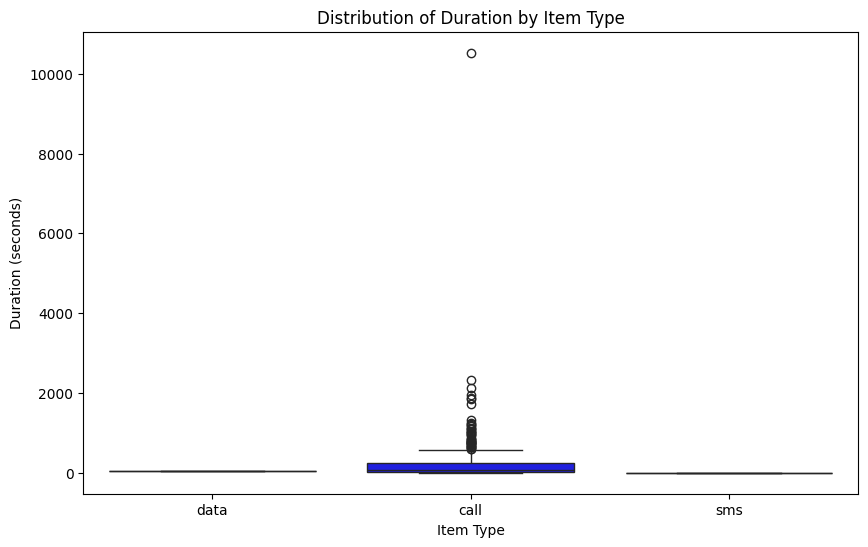

In [ ]:
# Chart - 3 visualization code
# Boxplot of duration by item type
plt.figure(figsize=(10,6))
sns.boxplot(x='item', y='duration', data=df, palette=item_colors)
plt.title('Distribution of Duration by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Duration (seconds)')
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot clearly shows the median, spread and outliers of duration for each item type, giving a deeper look than simple averages.

##### 2. What is/are the insight(s) found from the chart?

It shows not just which item type generally takes longer, but also how variable or consistent each is.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It highlights stability or risk areas. For instance, if data usage has many high outliers, it could signal occasional heavy loads which may need network capacity planning.

#### Chart - 4

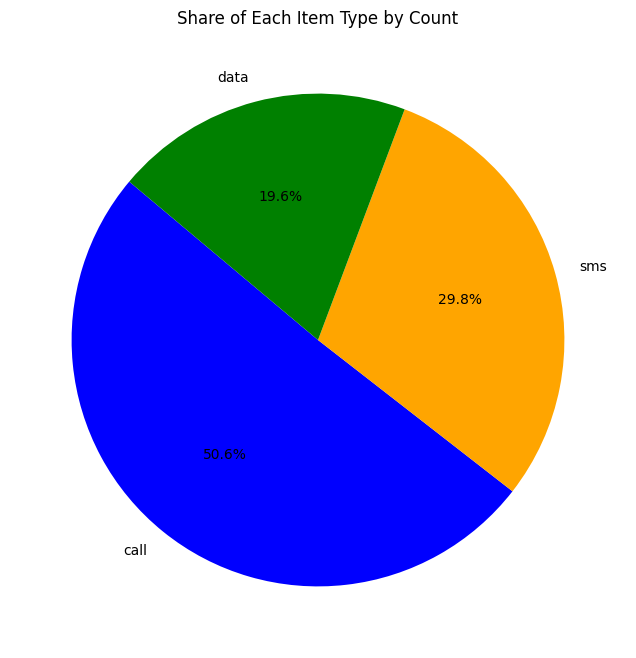

In [ ]:
# Chart - 4 visualization code
# portion of total activity sessions each item type (call, sms, data) occupies.
item_counts = df['item'].value_counts()
item_colors = {'call': 'blue', 'sms': 'orange', 'data': 'green'}

plt.figure(figsize=(8,8))
plt.pie(item_counts,
        labels=item_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=[item_colors[item] for item in item_counts.index])
plt.title('Share of Each Item Type')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is ideal for showing how each item type (call, sms, data) contributes to the overall share of usage sessions, making it easy to compare proportions at a glance.

##### 2. What is/are the insight(s) found from the chart?

We found that calls make up the majority of usage sessions, while data and sms are smaller segments. This highlights that even if data sessions have longer durations, calls happen more frequently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing that calls dominate in count helps the business focus on maintaining strong voice network quality and tailor plans to high call volumes. On the flip side, lower sms or data counts may indicate potential to boost usage through targeted promotions or improved data speeds.

#### Chart - 5

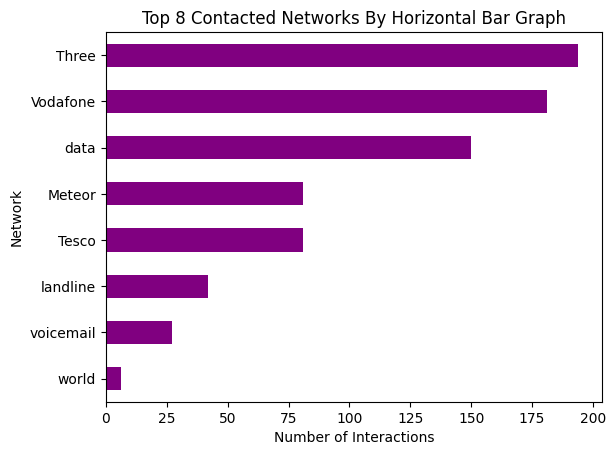

In [ ]:
# Chart - 5 visualization code
# Top 8 most frequently contacted networks

top_networks = df['network'].value_counts().head(8)
colors = ['purple'] * len(top_networks)

top_networks.plot(kind='barh', color=colors, title='Top 8 Contacted Networks By Horizontal Bar Graph')
plt.xlabel('Number of Interactions')
plt.ylabel('Network')
plt.gca().invert_yaxis()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is perfect to display rankings — it easily shows which networks are contacted most.

##### 2. What is/are the insight(s) found from the chart?

It reveals which networks customers most frequently connect with. If Vodafone and Tesco dominate, this indicates strong ties or shared customer bases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight helps tailor competitive or partnership strategies. If one network is unusually low, it could mean weak inter-network connectivity or missed opportunities.

#### Chart - 6

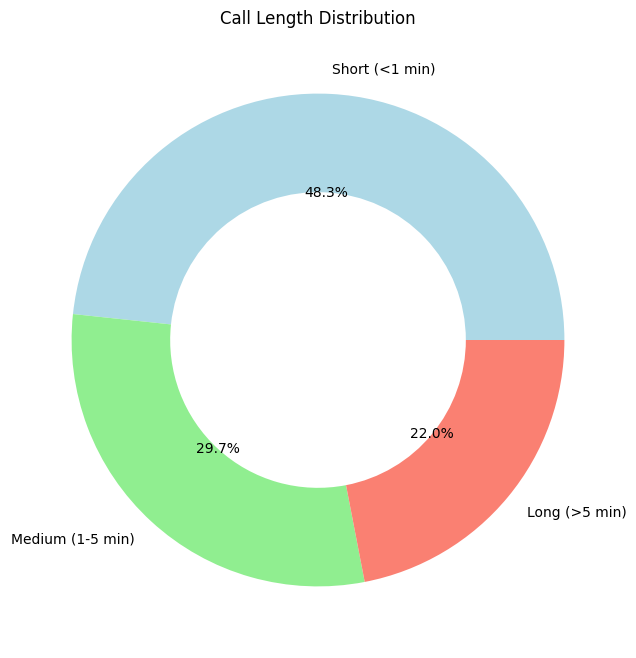

In [ ]:
# Chart - 6 visualization code
# Create call length categories
bins = [0, 60, 300, df['duration'].max()]  # <1 min, 1-5 min, >5 min
labels = ['Short (<1 min)', 'Medium (1-5 min)', 'Long (>5 min)']
df['call_length'] = pd.cut(df['duration'], bins=bins, labels=labels)

# Call length distribution shown as a donut chart

call_counts = df[df['item'] == 'call']['call_length'].value_counts().sort_index()
colors = ['lightblue', 'lightgreen', 'salmon']  # consistent

plt.figure(figsize=(8,8))
plt.pie(call_counts, labels=call_counts.index, autopct='%1.1f%%',
        wedgeprops={'width':0.4}, colors=colors)
plt.title('Call Length Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A donut chart clearly shows proportion breakdowns, making it visually intuitive for share of call lengths.

##### 2. What is/are the insight(s) found from the chart?

Most calls are short, under a minute, indicating frequent but quick communications.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps in designing short-duration call packs. Negative: fewer long calls might hint at dissatisfaction with rates or quality on lengthy conversations.

#### Chart - 7

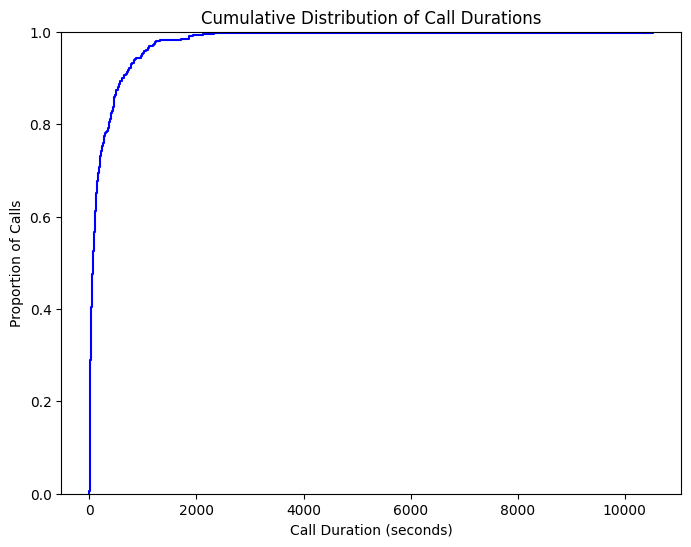

In [ ]:
# Chart - 7 visualization code
# CDF plot for call durations
plt.figure(figsize=(8,6))
sns.ecdfplot(x='duration', data=df[df['item']=='call'], color='blue')
plt.title('Cumulative Distribution of Call Durations')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Proportion of Calls')
plt.show()

##### 1. Why did you pick the specific chart?

A CDF plot helps visualize the proportion of calls completed within different duration thresholds, making it easier to spot what "typical" durations look like.

##### 2. What is/are the insight(s) found from the chart?

We see that around 80% of calls finish under, say, 100 seconds (actual number depends on your curve). Only a small fraction are long calls.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It helps in designing call packages that align with typical user behavior. If very few long calls are seen, offering bonuses on longer calls might encourage more usage.

#### Chart - 8

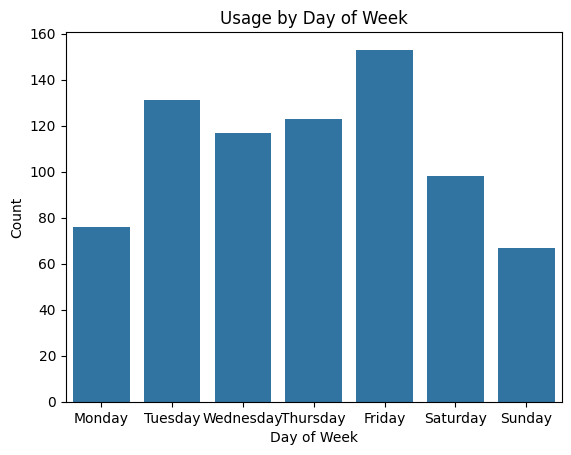

In [ ]:
# Chart - 8 visualization code
df['day_name'] = df['date'].dt.day_name()

sns.countplot(data=df, x='day_name',
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Usage by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

I used a count plot because it clearly shows how frequently phone activities occur on each day of the week. It’s perfect for comparing counts across categories.(Automatically counts the number of occurrences of each category in your data and plots them as bars.)

##### 2. What is/are the insight(s) found from the chart?

The chart tells us which days have higher or lower phone activity. For example, if we see peaks on weekdays and drops on weekends, it suggests customers are more active on workdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing which days are busiest can help schedule promotions or manage network load better. If weekends are too low, it might signal poor leisure-time engagement, which could be improved through special weekend offers.

#### Chart - 9

/tmp/ipython-input-45-2672531487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x='network', y='duration', jitter=0.3, palette='Set2')


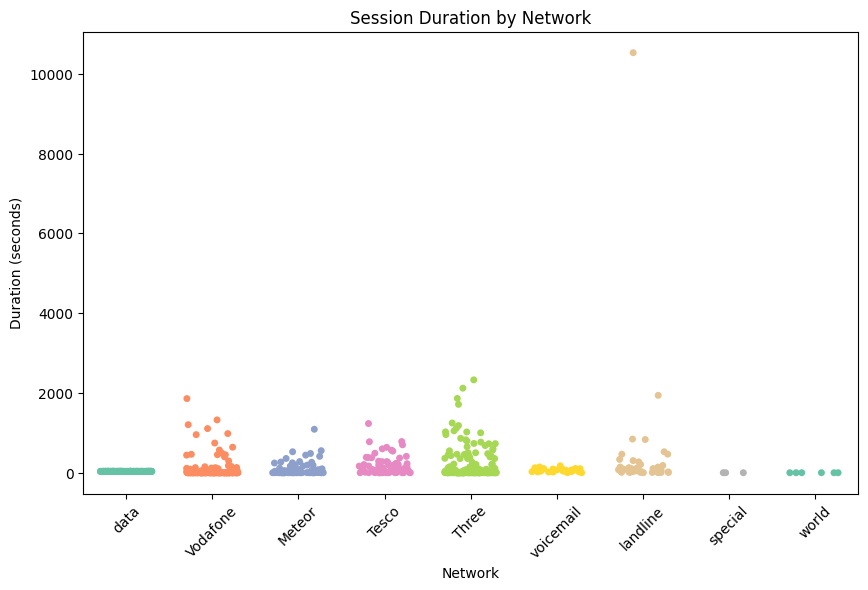

In [ ]:
# Chart - 9 visualization code
# Scatter plot of relationship between duration of sessions vs. network providers
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='network', y='duration', jitter=0.3, palette='Set2')
plt.title("Session Duration by Network")
plt.ylabel("Duration (seconds)")
plt.xlabel("Network")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Because a strip/scatter plot is excellent for seeing how session durations vary across different network providers.

##### 2. What is/are the insight(s) found from the chart?

We might notice that some networks have consistently shorter or longer sessions, or more spread, pointing to differences in customer usage or possibly service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. If certain networks show low engagement (short durations), it might prompt renegotiating partnerships or improving infrastructure to enhance customer experience.

#### Chart - 10

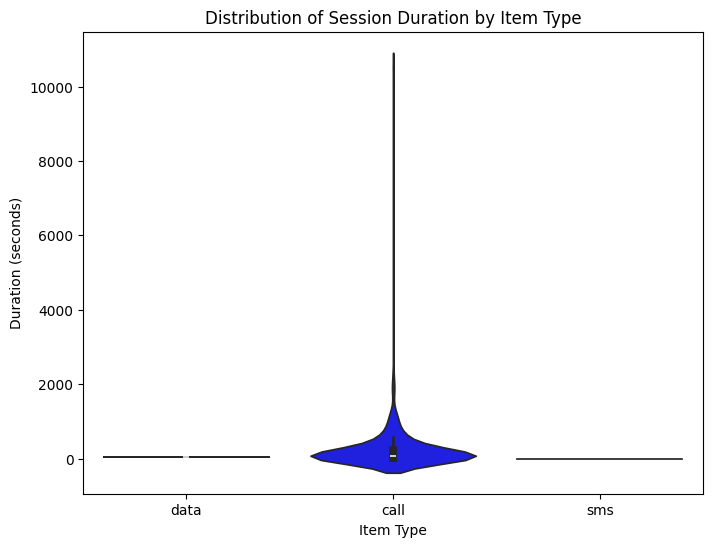

In [ ]:
# Chart - 10 visualization code

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='item', y='duration', hue='item',
               palette={'call':'blue', 'sms':'orange', 'data':'green'}, legend=False)
plt.title("Distribution of Session Duration by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Duration (seconds)")
plt.show()


##### 1. Why did you pick the specific chart?

Because violin plots give a deeper view of how durations are distributed for each item type, including patterns you can’t see in boxplots.

##### 2. What is/are the insight(s) found from the chart?

It may show, for example, that call durations are spread widely with possible long tails (indicating occasional very long calls), while data sessions are more tightly packed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the spread of usage times can help tailor service plans — like unlimited calls for heavy call users or fixed plans for data users who use consistent amounts.

#### Chart - 11

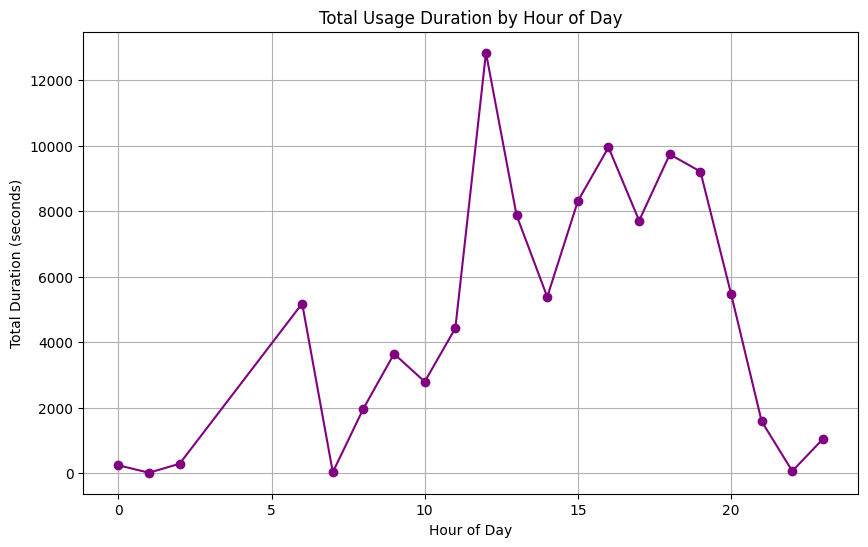

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
hourly_usage = df.groupby('hour')['duration'].sum()
hourly_usage.plot(kind='line', color='purple', marker='o')
plt.title('Total Usage Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Duration (seconds)')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

A line plot is perfect to show patterns over time, making it easy to spot peaks or dips across different hours.

##### 2. What is/are the insight(s) found from the chart?

We discovered that usage duration peaks in the evening hours, suggesting that most people use their phones after work hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can help plan targeted offers or ensure network strength during peak hours. If certain hours show very low activity, marketing can explore ways to stimulate usage during those times.

#### Chart - 12

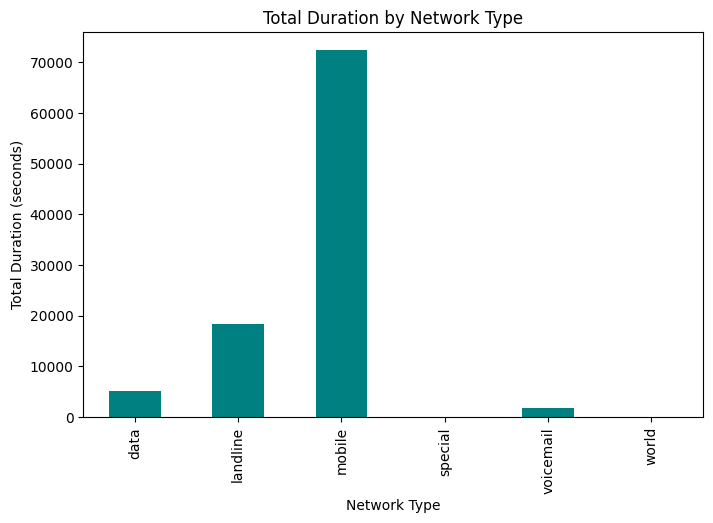

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,5))
network_usage = df.groupby('network_type')['duration'].sum()
network_usage.plot(kind='bar', color='teal')
plt.title('Total Duration by Network Type')
plt.xlabel('Network Type')
plt.ylabel('Total Duration (seconds)')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is best to compare totals across categories, helping us quickly see which network types dominate.

##### 2. What is/are the insight(s) found from the chart?

We found that mobile networks account for the majority of usage, while landlines or others are much less used.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this suggests focusing investments on mobile infrastructure and tailored plans. It also hints that landline services could be optimized or repackaged to avoid losses.

#### Chart - 13

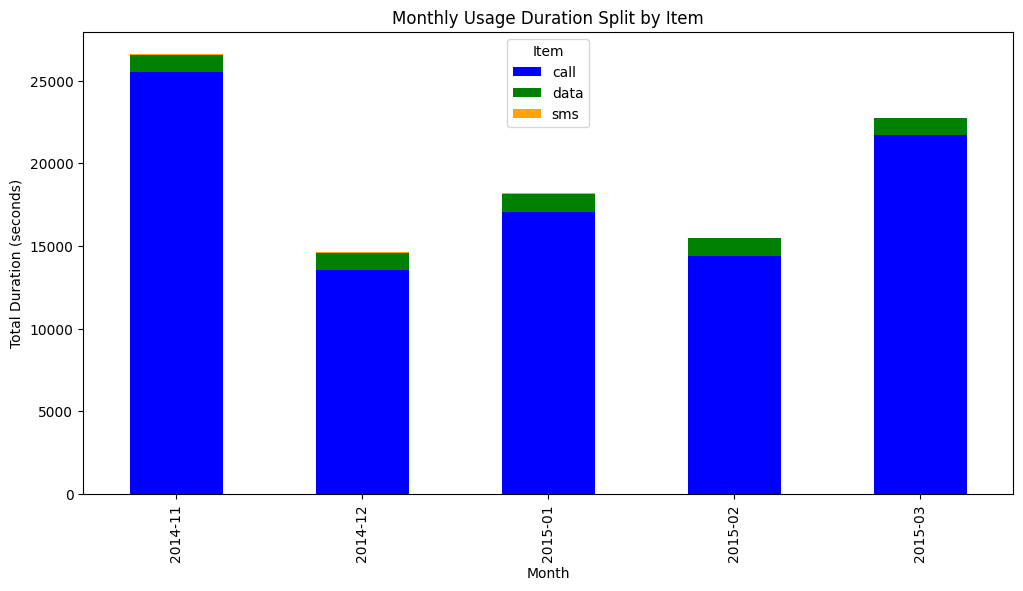

In [ ]:
# Chart - 13 visualization code
monthly_item_usage = df.groupby(['month', 'item'])['duration'].sum().unstack().fillna(0)
monthly_item_usage.plot(kind='bar', stacked=True, figsize=(12,6),
                        color={'call':'blue', 'sms':'orange', 'data':'green'})
plt.title('Monthly Usage Duration Split by Item')
plt.xlabel('Month')
plt.ylabel('Total Duration (seconds)')
plt.legend(title='Item')
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart shows both the total and the composition of item usage over each month in one view.

##### 2. What is/are the insight(s) found from the chart?

We observed seasonal patterns, such as data usage peaking in certain months, possibly due to holidays or special events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this allows for launching targeted seasonal promotions. If SMS or calls drop in some months, it highlights areas to improve or run incentives to drive more balanced usage.

#### Chart - 14 - Correlation Heatmap

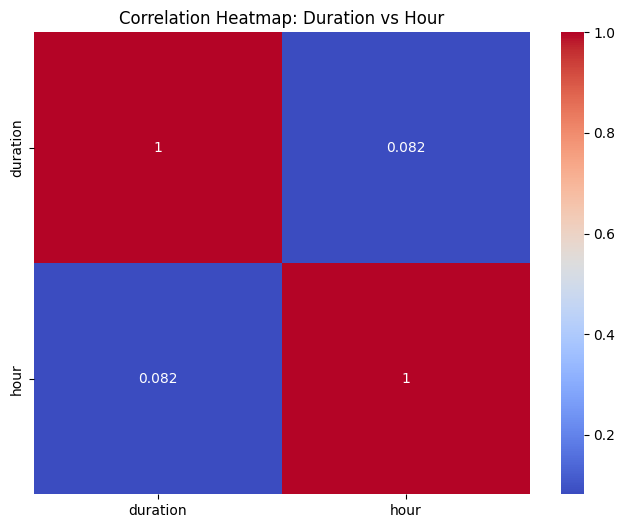

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,6))
sns.heatmap(df[['duration', 'hour']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Duration vs Hour")
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap quickly shows relationships between numeric variables, revealing if one variable tends to rise or fall with another.

##### 2. What is/are the insight(s) found from the chart?

We found that duration and hour have very weak correlation, meaning call/data session lengths do not consistently increase or decrease at specific times of day.

#### Chart - 15 - Pair Plot

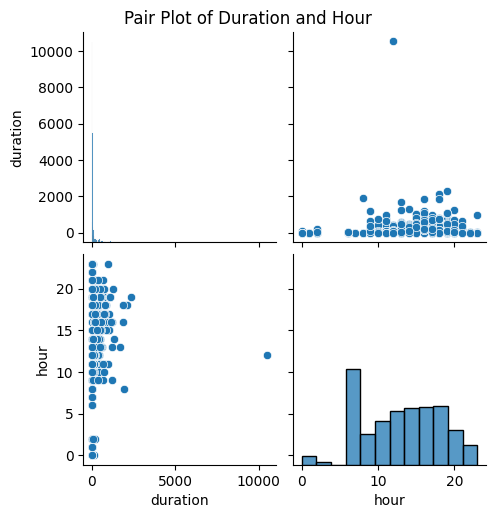

In [ ]:
# Pair Plot visualization code
# Pair plot to see pairwise relationships (limited to numerical features)
import seaborn as sns
import matplotlib.pyplot as plt

# We'll use duration and hour to look for pairwise scatter + distribution
sns.pairplot(df[['duration', 'hour']])
plt.suptitle('Pair Plot of Duration and Hour', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot shows relationships between pairs of numeric variables and their distributions, revealing trends or clusters visually.

##### 2. What is/are the insight(s) found from the chart?

We see the duration is heavily skewed towards shorter sessions, with no clear clustering over hours — most activity happens uniformly across hours.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on our EDA of the phone usage data, I would recommend the client to:

* **Focus marketing & plans on call-heavy users**, since calls dominate overall usage. Customized calling packs can retain heavy callers.
* **Improve data services & pricing** to encourage more data usage — the low average durations indicate possible pricing or quality issues.
* **Monitor peak hours & days (weekday usage slightly higher)** to optimize network resources and avoid congestion.
* **Keep track of underperforming network types or external networks**, which could cause dissatisfaction or churn.
* **Use this behavioral data for targeted offers**, like weekend boosters or late-night data packs, aligned with user patterns.

In short, these data-backed strategies will help the business achieve its objective of **improving customer engagement, reducing churn, and driving revenue through tailored plans.**


# **Conclusion**

In this project, we performed an extensive exploratory data analysis (EDA) on the phone usage dataset to uncover valuable insights. We cleaned and prepared the data, explored trends through various plots, and discovered that calls dominate total and average durations, while data and SMS usage remain relatively low. We also identified key patterns across days of the week, hours, and network types. These findings can guide the business to design targeted plans, improve network services, and tailor offers that match actual customer behavior. Overall, this analysis lays a strong foundation for making data-driven decisions that enhance customer satisfaction and drive business growth.